# Phase 1, stage 2 - visualising the prediction results and running LIME

In [5]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

plt.rcParams['figure.figsize'] = [10, 10]

date = "06May2022"
model_name = "./model/all9variants_size400_" + date
output_csv_name = "./output/all9classes_predictions_" + date + ".csv"
qc_csv_name = "./output/all_info_size400_stage0filtered_" + date + ".csv"
output_json_name = "./output/all9classes_index_" + date + ".json"

In [6]:
all_df = pd.read_csv(output_csv_name)
all_df = all_df.loc[all_df.qc_class.isin(["airliner", "warplane", "airship"]), ]

with open(output_json_name, "r") as f:
    class_index = json.load(f)

all_df.columns

Index(['index', 'long_model', 'airline', 'photo_date', 'uploaded_date',
       'location', 'uploader', 'photo_link', 'download_path', 'model',
       'variant', 'qc_class', 'purpose', 'classes', 'pred_A320', 'pred_A330',
       'pred_A340', 'pred_A350', 'pred_A380', 'pred_B737', 'pred_B747',
       'pred_B777', 'pred_B787', 'prediction_class'],
      dtype='object')

In [7]:
all_df["prediction_class"]

0        A320
1        A320
2        A320
3        A320
4        A320
         ... 
18489    B787
18490    B787
18491    B787
18492    B737
18493    B787
Name: prediction_class, Length: 18494, dtype: object

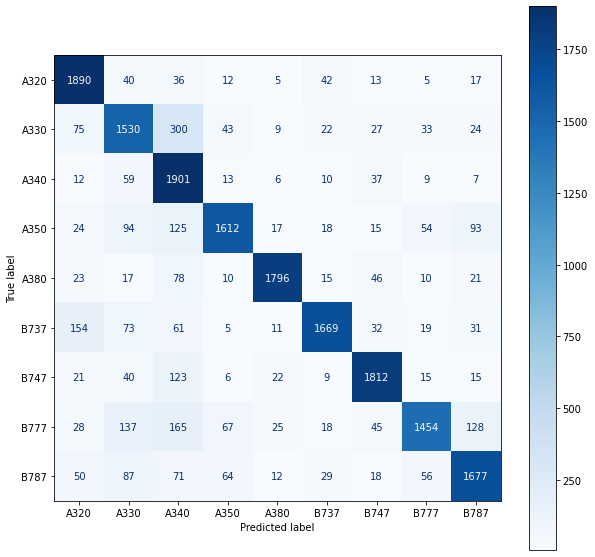

In [8]:
cm = confusion_matrix(all_df["model"], all_df["prediction_class"])
cmd = ConfusionMatrixDisplay(cm, display_labels=class_index.values())
cmd.plot(cmap="Blues")

# Visualise incorrect predictions for A380 

In [9]:
rstats = 158
a380_correct = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class=="A380"),:].sample(n=3, random_state=rstats)
a380_incorrect = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class!="A380"),:].sample(n=6, random_state=rstats)

In [10]:
a380_correct

,index,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,...,pred_A320,pred_A330,pred_A340,pred_A350,pred_A380,pred_B737,pred_B747,pred_B777,pred_B787,prediction_class
9544,9672,Airbus A380-841,All Nippon Airways (ANA),Photo date: 2020-06-25,Uploaded: 2020-11-14,"Location: Toulouse Blagnac - LFBO, France",By: Daniel Pacheco,cdn.jetphotos.com/400/5/51816_1604758195.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-51...,A380,...,-3.342557,-2.550090,-2.724345,-2.345059,1.810242,-2.459459,-1.328242,-1.274819,-0.282796,A380
8775,8886,Airbus A380-841,Singapore Airlines,Photo date: 2015-08-22,Uploaded: 2021-02-18,"Location: London Heathrow Int'l - EGLL, United...",By: X Pan,cdn.jetphotos.com/400/5/74309_1613217588.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-74...,A380,...,-11.470081,-11.785214,-10.093720,-5.538174,8.483480,-3.188129,-2.620223,-4.992475,-1.807937,A380
10222,10376,Airbus A380-841,China Southern Airlines,Photo date: 2019-07-27,Uploaded: 2020-07-15,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: KenKen Huang,cdn.jetphotos.com/400/5/15547_1594150501.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-15...,A380,...,-6.480943,-3.618731,-1.533336,-2.959852,3.169521,-5.224298,-1.699552,-1.964586,-3.472402,A380


In [11]:
a380_incorrect

,index,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,...,pred_A320,pred_A330,pred_A340,pred_A350,pred_A380,pred_B737,pred_B747,pred_B777,pred_B787,prediction_class
9747,9884,Airbus A380-841,Lufthansa,Photo date: 2018-02-06,Uploaded: 2020-10-10,"Location: Beijing Capital - ZBAA, China",By: DZX_14572,cdn.jetphotos.com/400/5/25872_1601820224.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-25...,A380,...,-5.368421,-1.051922,2.698961,-3.843046,-0.518030,0.125119,0.361949,-2.350102,-3.351710,A340
8872,8985,Airbus A380-841,China Southern Airlines,Photo date: 2021-01-23,Uploaded: 2021-02-04,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: songxiuming,cdn.jetphotos.com/400/5/20058_1612017664.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-20...,A380,...,-4.838057,-3.613405,0.411859,-4.859452,1.169301,-4.793808,1.195064,-0.594622,-4.880840,B747
9858,10002,Airbus A380-861,Emirates,Photo date: 2019-09-21,Uploaded: 2020-09-25,"Location: London Gatwick Airport - EGKK, Unite...",By: Ollie J Verrian,cdn.jetphotos.com/400/6/15142_1600198693.jpg,./img/size_400/A380/cdn.jetphotos.com-400-6-15...,A380,...,-8.840802,-0.655348,5.496611,-5.088553,-5.015805,-5.315327,5.386146,-2.224048,-4.777507,A340
8443,8541,Airbus A380-841,Asiana Airlines,Photo date: 2018-11-30,Uploaded: 2021-04-29,"Location: Tokyo Narita Int'l Airport - RJAA, J...",By: Yau Yu Hao,cdn.jetphotos.com/400/5/88994_1618680891.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-88...,A380,...,-4.423979,-1.242968,-1.377568,-2.807233,-0.855960,-1.941367,-0.907814,-0.079779,-2.622327,B777
9089,9209,Airbus A380-841,China Southern Airlines,Photo date: 2020-12-30,Uploaded: 2021-01-03,Location: Melbourne Tullamarine Int'l Airport ...,By: XING LI,cdn.jetphotos.com/400/5/11231_1609306728.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-11...,A380,...,-6.436856,-3.788806,1.073688,-3.937469,1.134933,-5.173477,2.361248,-1.908470,-5.580880,B747
10243,10397,Airbus A380-841,China Southern Airlines,Photo date: 2020-06-30,Uploaded: 2020-07-12,"Location: Zhengzhou - ZHCC, China",By: Zeyu Lu,cdn.jetphotos.com/400/5/42284_1593873645.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-42...,A380,...,-4.650489,-2.725842,-0.279200,-3.138276,0.722989,-6.276840,1.116264,-2.221363,-4.649427,B747


In [12]:
img_df = pd.concat([a380_correct, a380_incorrect], axis=0)
img_df["download_path"].values

array(['./img/size_400/A380/cdn.jetphotos.com-400-5-51816_1604758195.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-74309_1613217588.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-15547_1594150501.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-25872_1601820224.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-20058_1612017664.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-6-15142_1600198693.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-88994_1618680891.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-11231_1609306728.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-42284_1593873645.jpg'],
      dtype=object)

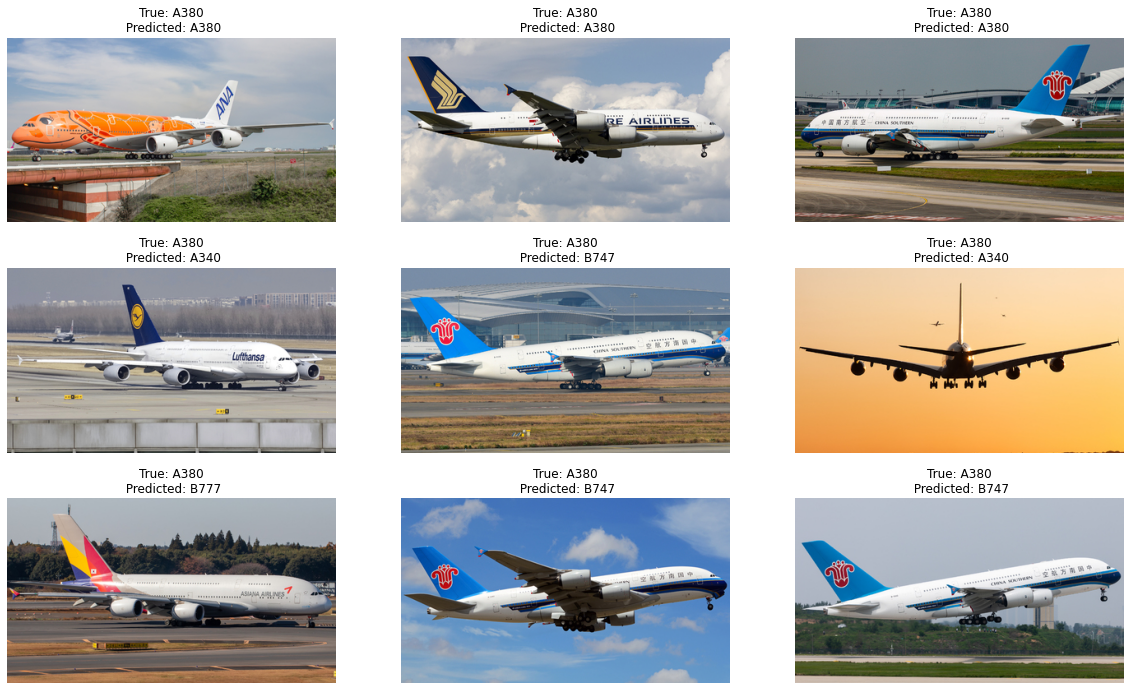

In [13]:
plt.figure(figsize=(20, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_df["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "True: " + img_df["model"].values[i] + "\n Predicted: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

In [14]:
rstats = 22
a380_pred_correct = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class=="A380"),:].sample(n=3, random_state=rstats)
a380_pred_incorrect = all_df.loc[(all_df.model!="A380") & (all_df.prediction_class=="A380"),:].sample(n=6, random_state=rstats)

In [15]:
img_df = pd.concat([a380_pred_correct, a380_pred_incorrect], axis=0)
img_df["download_path"].values

array(['./img/size_400/A380/cdn.jetphotos.com-400-5-19238_1606997531.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-6-79052_1606159417.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-53993_1619918514.jpg',
       './img/size_400/A320/cdn.jetphotos.com-400-6-15733_1622860117.jpg',
       './img/size_400/B747/cdn.jetphotos.com-400-6-60197_1622614183.jpg',
       './img/size_400/B777/cdn.jetphotos.com-400-5-88595_1621196692.jpg',
       './img/size_400/A350/cdn.jetphotos.com-400-6-17130_1617666836.jpg',
       './img/size_400/B737/cdn.jetphotos.com-400-6-92242_1622649879.jpg',
       './img/size_400/A330/cdn.jetphotos.com-400-6-93698_1620394444.jpg'],
      dtype=object)

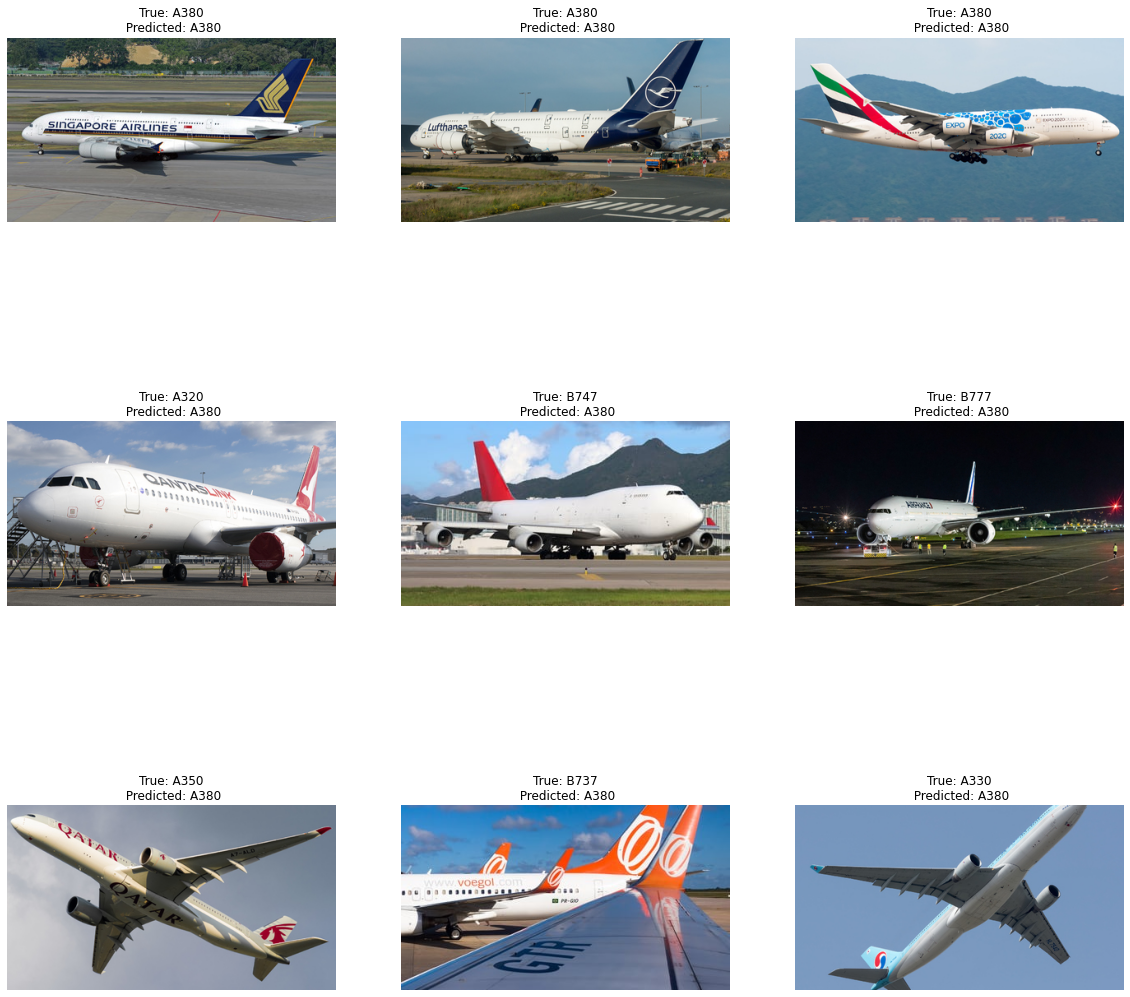

In [16]:
plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_df["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "True: " + img_df["model"].values[i] + "\n Predicted: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

# Visualising QC classes

airliner         2036
warplane           25
wing                8
missile             4
bullet_train        2
airship             2
barrel              1
space_shuttle       1
pop_bottle          1
Name: qc_class, dtype: int64


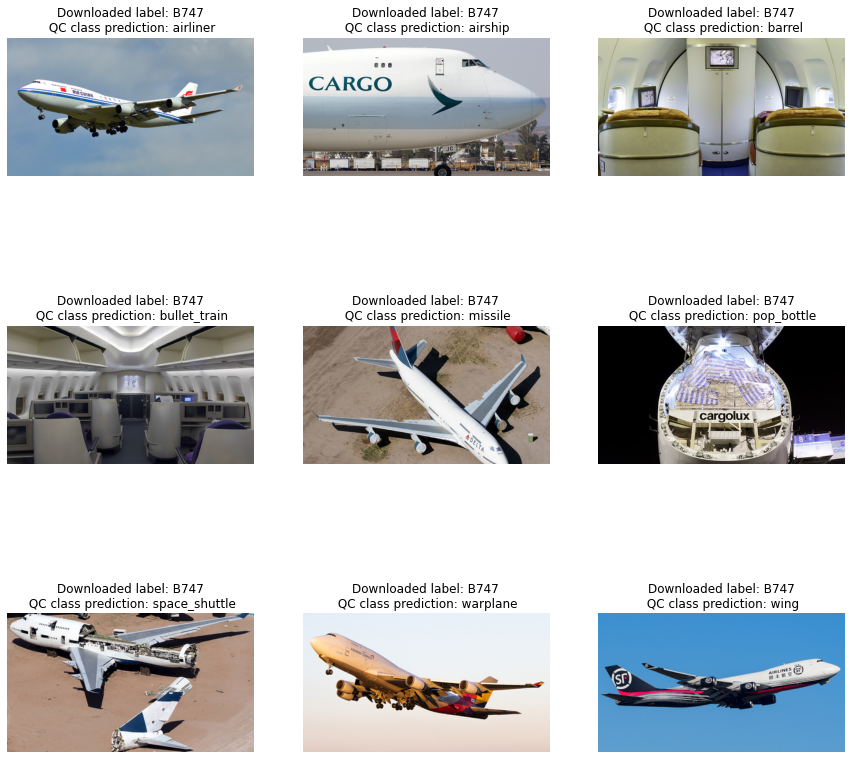

In [17]:
tmp = pd.read_csv(qc_csv_name)
tmp = tmp.loc[tmp.model.isin(["B747"]), ]
print(tmp.qc_class.value_counts())
tmp = tmp.groupby("qc_class").sample(n = 1, random_state = 1)
plt.figure(figsize=(15, 15))
for i in range(tmp.shape[0]):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(tmp["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "Downloaded label: " + tmp["model"].values[i] + "\n QC class prediction: " + tmp["qc_class"].values[i]
    ax.set_title(title)

# Using LIME to explain the classifications

In [18]:
import os
import keras
# from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
# from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.8.0


In [19]:
model = keras.models.load_model(model_name)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-10 16:22:41.500860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 16:22:41.500969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(225, 400))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = prep_fn(x)
        out.append(x)
    return np.vstack(out)

In [21]:
from lime import lime_image

In [22]:
explainer = lime_image.LimeImageExplainer()

def explain_and_plot(image):
    explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=100, hide_rest=True)
    return plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [23]:
from skimage.segmentation import mark_boundaries

(12, 24)


  0%|          | 0/1000 [00:00<?, ?it/s]2022-05-10 16:22:45.377133: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-10 16:22:45.536644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
100%|██████████| 1000/1000 [00:10<00:00, 98.85it/s]


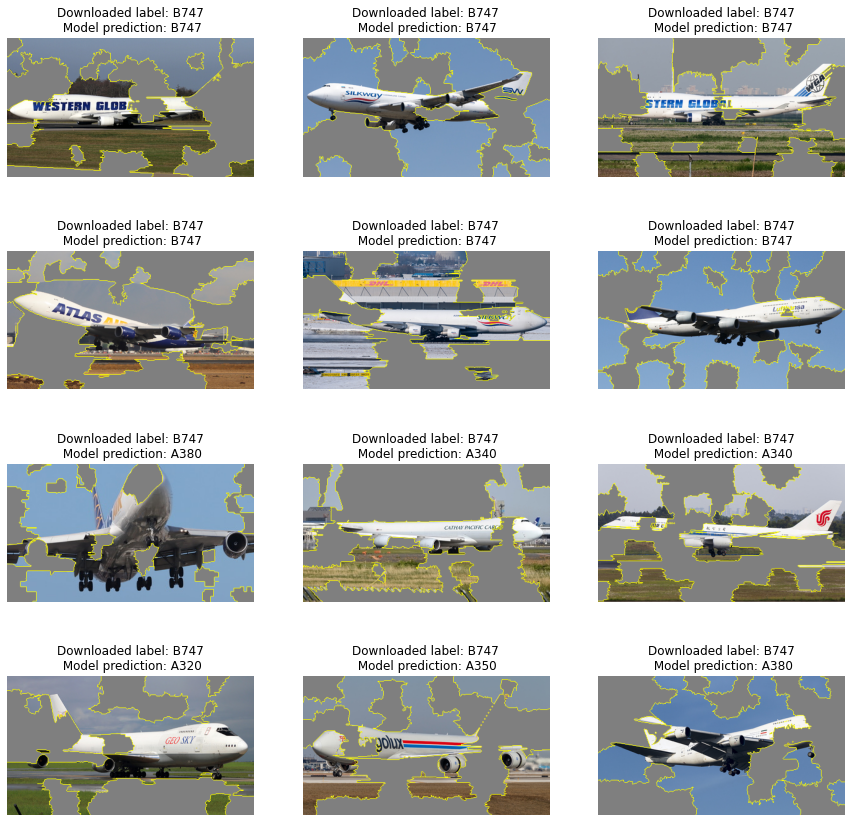

In [24]:
b747_correct = all_df.loc[(all_df.model=="B747") & (all_df.prediction_class=="B747"),:].sample(n=6, random_state=2)
b747_incorrect = all_df.loc[(all_df.model=="B747") & (all_df.prediction_class!="B747"),:].sample(n=6, random_state=5)
img_df = pd.concat([b747_correct, b747_incorrect], axis=0)
images = transform_img_fn(img_df.loc[:, "download_path"].values)

print(img_df.shape)
plt.figure(figsize=(15, 15))

for i in range(img_df.shape[0]):
    ax = plt.subplot(4, 3, i + 1)
    # img = mpimg.imread(img_df["download_path"].values[i])
    # plt.imshow(img)
    explain_and_plot(images[i])
    plt.axis("off")
    title = "Downloaded label: " + img_df["model"].values[i] + "\n Model prediction: " + img_df["prediction_class"].values[i]
    ax.set_title(title)